In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


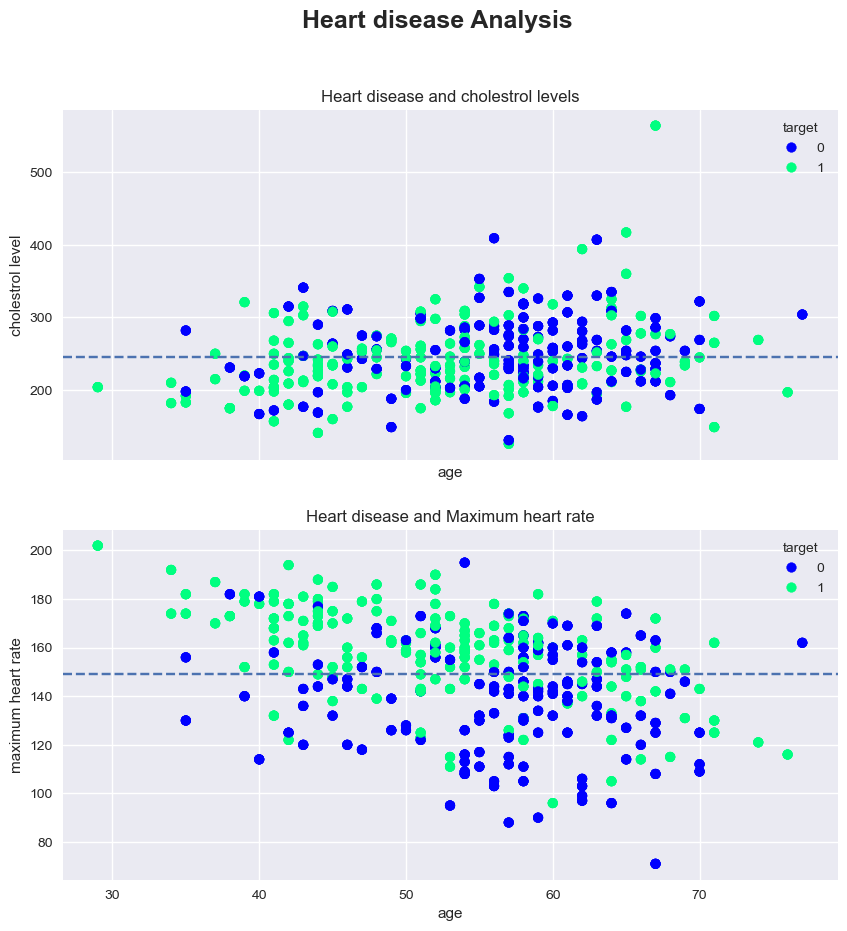

In [5]:
plt.style.use("seaborn-v0_8")

fig,(ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

scatter1 = ax0.scatter(x=data['age'],y=data['chol'],c=data['target'],cmap="winter")
ax0.set(title="Heart disease and cholestrol levels",xlabel="age",ylabel="cholestrol level")
ax0.legend(*scatter1.legend_elements(),title='target')
ax0.axhline(data['chol'].mean(),linestyle="--")

scatter2 = ax1.scatter(x=data['age'],y=data['thalach'],c=data['target'],cmap="winter")
ax1.set(title="Heart disease and Maximum heart rate",xlabel="age",ylabel="maximum heart rate")
ax1.legend(*scatter2.legend_elements(),title="target")
ax1.axhline(data['thalach'].mean(),linestyle='--')

fig.suptitle("Heart disease Analysis",fontsize=18,fontweight="bold");

### Importing necessary Library

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Data Preprocessing 

In [8]:
from sklearn.preprocessing import StandardScaler

binary_features = ['sex', 'fbs', 'exang']
multi_class_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_encoded = pd.get_dummies(data, columns=multi_class_features, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

#saving the preprocessed file's
X.to_csv("preprocessed_features_sample.csv", index=False)
y.to_csv("preprocessed_target_sample.csv", index=False)